# Revision History
## May 26
  - Minor typos correction
  - count_matrix_query = 8406 x 200 matrix (terms x documents) ->
     count_matrix_query = 8406 x 225 matrix (terms x queries)
  - Function Description of tfidf_weight(d, q, mode='nnn.nnn', topk=50) was added
    - Compute the tf-idf weights for all the documents and the query
    - Compute cosine similarities between all the documents and the query
    - Sort cosine similarity values and return top-k documents with the highest values.

# Setting
## packages

In [1]:
!pip install ir-datasets

zsh:1: command not found: pip


## libraries
- To tokenize a sentence and lemmatize words, use *get_normalized_toks()*.
- To get relevaent documents, use *get_answer_set()*.


In [68]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem import WordNetLemmatizer

import ir_datasets

nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

# Return normalized words after tokenizing a sentence and lemmatizing words
def get_normalized_toks(my_sentence):
  toks = word_tokenize(my_sentence)
  lemmatizer = WordNetLemmatizer()

  # Refer to https://www.ling.upenn.edu/courses/Fall_2003/ling001/penn_treebank_pos.html
  tags = nltk.pos_tag(toks)
  result = []
  ## from https://velog.io/@pheol9166/%ED%91%9C%EC%A0%9C%EC%96%B4-%EC%B6%94%EC%B6%9CLemmatization
  for token, tag in tags:
    if tag.startswith('N'):
      lemma = lemmatizer.lemmatize(token, pos='n')
    elif tag.startswith('V'):
      lemma = lemmatizer.lemmatize(token, pos='v')
    elif tag.startswith('J'):
      lemma = lemmatizer.lemmatize(token, pos='a')
    elif tag.startswith('R'):
      lemma = lemmatizer.lemmatize(token, pos='r')
    else:
      lemma = lemmatizer.lemmatize(token)

    result.append(lemma)
  return result


# dataset type: ir_datasets.datasets.base.Dataset
# qid: query id (string type)
def get_answer_set(dataset, qid):
  res = []
  for qrel in dataset.qrels_iter():
    if qid == qrel.query_id:
      if qrel.relevance != -1:
        #print(qrel.query_id, qrel.doc_id, qrel.relevance, qrel.iteration)
        res.append('d'+qrel.doc_id)
  return np.array(res)


print()

#  Example
s = 'experimental investigation of the aerodynamics of a\nwing in a slipstream .\n  an experimental study of a wing in a propeller slipstream was\nmade in order to determine the spanwise distribution of the lift\nincrease due to slipstream at different angles of attack of the wing\nand at different free stream to slipstream velocity ratios.'
toks = get_normalized_toks(s)
print('# example of get_normalized_toks:', toks)

#  Example
dataset = ir_datasets.load("cranfield")
print('the relevant documents of query 1:', get_answer_set(dataset, '1'))


# example of get_normalized_toks: ['experimental', 'investigation', 'of', 'the', 'aerodynamics', 'of', 'a', 'wing', 'in', 'a', 'slipstream', '.', 'an', 'experimental', 'study', 'of', 'a', 'wing', 'in', 'a', 'propeller', 'slipstream', 'be', 'make', 'in', 'order', 'to', 'determine', 'the', 'spanwise', 'distribution', 'of', 'the', 'lift', 'increase', 'due', 'to', 'slipstream', 'at', 'different', 'angle', 'of', 'attack', 'of', 'the', 'wing', 'and', 'at', 'different', 'free', 'stream', 'to', 'slipstream', 'velocity', 'ratio', '.']
the relevant documents of query 1: ['d184' 'd29' 'd31' 'd12' 'd51' 'd102' 'd13' 'd14' 'd15' 'd57' 'd378'
 'd859' 'd185' 'd30' 'd37' 'd52' 'd142' 'd195' 'd875' 'd56' 'd66' 'd95'
 'd462' 'd497' 'd858' 'd876' 'd879' 'd880']


[nltk_data] Downloading package punkt to
[nltk_data]     /Users/deukmosong/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/deukmosong/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/deukmosong/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


# Loading Cranfield Data Set

 - ref: https://ir-datasets.com/cranfield.html

In [70]:
import ir_datasets
dataset = ir_datasets.load("cranfield")
# print sample documents (first two documents)
print("################ Cranfield Samples #############")
for doc in dataset.docs_iter()[:2]:
    print('###################################')
    print('- doc:', doc) # namedtuple<doc_id, title, text, author, bib>
    print('\n')
    print('- doc.text:', doc.text)
    print('\n')

################ Cranfield Samples #############
###################################
- doc: CranfieldDoc(doc_id='1', title='experimental investigation of the aerodynamics of a\nwing in a slipstream .', text='experimental investigation of the aerodynamics of a\nwing in a slipstream .\n  an experimental study of a wing in a propeller slipstream was\nmade in order to determine the spanwise distribution of the lift\nincrease due to slipstream at different angles of attack of the wing\nand at different free stream to slipstream velocity ratios .  the\nresults were intended in part as an evaluation basis for different\ntheoretical treatments of this problem .\n  the comparative span loading curves, together with\nsupporting evidence, showed that a substantial part of the lift increment\nproduced by the slipstream was due to a /destalling/ or\nboundary-layer-control effect .  the integrated remaining lift\nincrement, after subtracting this destalling lift, was found to agree\nwell with a pote

# Making a simple dictionary
- Make a simple dictionary structure with 1400 Cranfield Documents (Use CranfieldDoc.text. Do not include CranfieldDoc.title)
  - variable name: my_dic
  - Ignore two documents with the empy text.
- Get normalized tokens using "get_normalized_toks()" and use them as terms in the dictionary.
  - Punctuation marks such as "." may be included in terms. It is ok.
- Dictionary structure using python dict().
  - dictionary form: {word1:count1, word2:count2, word3:count3, ...}
  - key: word, value: word count


In [71]:
my_dic = {}
NUM_DOC = 1400 - 2
NUM_QUERY = 225

dataset = ir_datasets.load("cranfield")

for doc in dataset.docs_iter():
    if doc.text == '':
        print("error:", doc.doc_id)
        continue
    toks = get_normalized_toks(doc.text)
    for tok in toks:
        if tok in my_dic:
            my_dic[tok] += 1
        else:
            my_dic[tok] = 1
            
print(f"Dictionary size: {len(my_dic)}")
print(my_dic)

error: 471
error: 995
Dictionary size: 8406
{'experimental': 421, 'investigation': 341, 'of': 12609, 'the': 19421, 'aerodynamics': 25, 'a': 6836, 'wing': 705, 'in': 4612, 'slipstream': 41, '.': 9941, 'an': 1388, 'study': 318, 'propeller': 72, 'be': 9771, 'make': 499, 'order': 170, 'to': 4524, 'determine': 326, 'spanwise': 42, 'distribution': 596, 'lift': 303, 'increase': 370, 'due': 170, 'at': 1830, 'different': 125, 'angle': 425, 'attack': 207, 'and': 6129, 'free': 170, 'stream': 240, 'velocity': 553, 'ratio': 584, 'result': 1055, 'intend': 12, 'part': 153, 'evaluation': 33, 'basis': 76, 'for': 3480, 'theoretical': 281, 'treatment': 44, 'this': 1080, 'problem': 591, 'comparative': 7, 'span': 42, 'load': 277, 'curve': 153, ',': 7062, 'together': 42, 'with': 2259, 'support': 88, 'evidence': 30, 'show': 588, 'that': 1568, 'substantial': 18, 'increment': 8, 'produce': 91, 'by': 1742, '/destalling/': 1, 'or': 481, 'boundary-layer-control': 1, 'effect': 916, 'integrated': 5, 'remain': 52, '

# Zipf's law
- Sort <word, count> pairs in decreasing order from ***my_dic***.
- Draw the pairs (i, word_count_i) using ***pyplot.plot()***.
  - (1, 19421), (2, 12609), ..., (8406, 1)

Dictionary size: 8406


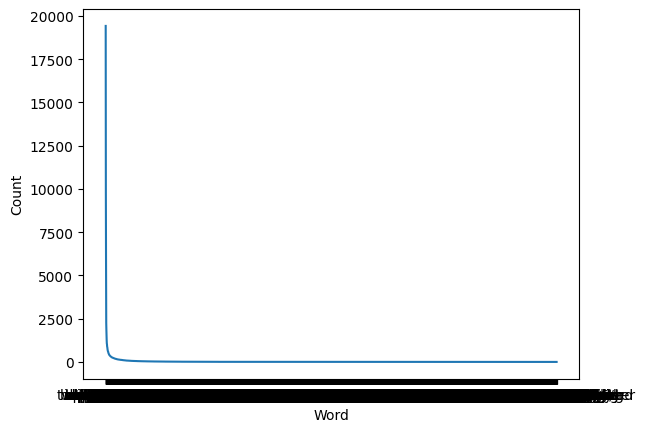

In [72]:
import matplotlib.pyplot as plt



sorted_pairs = sorted(my_dic.items(), key=lambda x: x[1], reverse=True)

print(f"Dictionary size: {len(my_dic)}")

plt.plot([pair[0] for pair in sorted_pairs], [pair[1] for pair in sorted_pairs])
plt.xlabel('Word')
plt.ylabel('Count')
plt.show()

########### [Capture1] Capture your pyplot.plot image ##############

- Draw the pairs (log10(i), log10(word_count_i)) using pyplot.plot().
  - (log10(1), log10(19421)), (log10(2), log10(12609)), ..., (log10(8406), log10(1))
- Draw the equation log10(cfi) = log10(c) + k log10(i) where log10(c) = 4.3, k=-1.
  - (log10(1), 4.3-log10(1)), (log10(2), 4.3-log10(2)), ..., (log10(8406), 4.3-log10(8406))

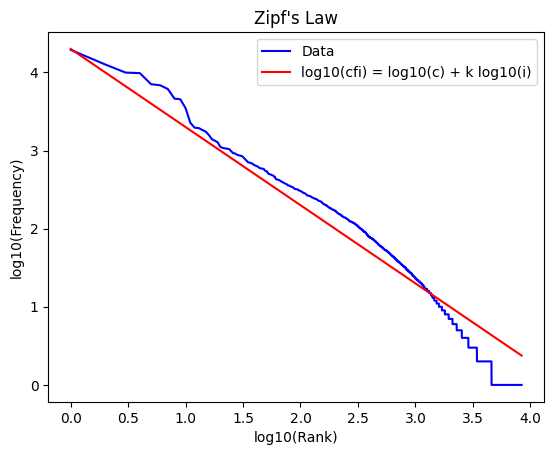

In [74]:
import matplotlib.pyplot as plt
import numpy as np



sorted_word_counts = sorted(my_dic.items(), key=lambda x: x[1], reverse=True)


ranks = np.array(range(1, len(sorted_word_counts) + 1))
counts = np.array([word_count[1] for word_count in sorted_word_counts])


log_ranks = np.log10(ranks)
log_counts = np.log10(counts)


plt.plot(log_ranks, log_counts, 'b-', label='Data')


log10_c = 4.3
k = -1
x = log_ranks
y = log10_c + k * x
plt.plot(x, y, 'r-', label='log10(cfi) = log10(c) + k log10(i)')


plt.xscale('linear')
plt.yscale('linear')


plt.xlabel('log10(Rank)')
plt.ylabel('log10(Frequency)')
plt.title('Zipf\'s Law')
plt.legend()
plt.show()
########### [Capture2] Capture your pyplot.plot image ##############

# Making a count matrix
- Count Matrix Format
  - count_matrix = 8406 x 1398 matrix (terms x documents)
  - count_matrix[i, j] = word count of the i-th term at the j-th document
    - Terms should be sorted alphabetically.
  - use pandas.DataFrame for easy handling or use numpy

In [75]:
import re
import nltk
import ir_datasets
import pandas as pd
import numpy as np


new_dic = {}
NUM_DOC = 1400 - 2
NUM_QUERY = 225

dataset1 = ir_datasets.load("cranfield")

for doc in dataset1.docs_iter():
    if doc.text == '':
        continue
    toks = get_normalized_toks(doc.text)
    for tok in toks:
        if tok in new_dic:
            new_dic[tok] += 1
        else:
            new_dic[tok] = 1
            

unique_words = sorted(my_dic.keys())
# Count matrix를 초기화할 배열 생성
num_docs = len(list(dataset.docs_iter()))
count_matrix_query = np.zeros((len(unique_words), num_docs-2), dtype=int)

# Count matrix 구성
count=0
for doc in dataset.docs_iter():
    if doc.text == '':
        count+=1
        continue  # 비어 있는 텍스트는 건너뜁니다.
    
    toks = get_normalized_toks(doc.text)
    doc_id = int(doc.doc_id) - 1 -count # Assuming doc_id starts from 1
    for tok in toks:
        if tok in my_dic:  # my_dic에 존재하는 단어만 count matrix에 반영
            i = unique_words.index(tok)
            count_matrix_query[i, doc_id] += 1  # Frequency count

# pandas DataFrame으로 변환 (옵션)
column_names = [f'q{doc_id+1}' for doc_id in range(num_docs-2)]
count_matrix_query_df = pd.DataFrame(count_matrix_query, index=unique_words, columns=column_names)

print("Unique words:", unique_words)
print(count_matrix_query_df)


Unique words: ['$', "'", "''", "'density", "'displacement", "'equivalent", "'exact", "'exact'", "'fat'", "'first", "'flow", "'freeze", "'freezing", "'heat", "'low-beta", "'magnus", "'matching", "'mesh", "'mixed", "'non-viscous", "'ogee", "'oseen", "'outer", "'oxygen-like", "'plane", "'qualitatively", "'quasi-cylinder'", "'reservoir", "'s", "'second", "'similar'", "'slender-body", "'slice", "'stokes", "'straight-through", "'tailored", "'that", "'thermal", "'two-diagram", "'velocity", "'wall", '(', ')', '*', '+', '+100', '+18degree', ',', '-', '--', '-0.0904', '-0.199', '-1.2', '-1.23849', '-10', '-340', '-4', '-40', '-40degree', '-4degree', '-4degrees', '-60', '-67.6', '-90', '-dash', '-distribution', '-semivertex-angle', '-yy', '.', '..', '...', './', './b/estimation', './c/control-system', './d/design', '.0.', '.1.', '.2.', '.21153', '.3.', '.4', '.4.', '.5', '.5.', '.6', '.78847', '.92', '.97', '.and', '.but', '.ii', '.it', '.iv', '.qm', '.section', '.the', '.they', '.vi', '/', '/-da

In [76]:
# [Capture3] Capture the result of the following statement if the type of count matrix is DataFrame
count_matrix_query_df.loc[count_matrix_query_df['q2']>0, 'q2']

's            1
,             5
.            10
a            10
again         1
             ..
viscosity     2
viscous       2
vorticity     2
wave          2
while         1
Name: q2, Length: 95, dtype: int64

# Making a count matrix for queries (just for convenience)
- Count Matrix Format for queries
  - count_matrix_query = 8406 x 225 matrix (terms x queries)
  - count_matrix[i, j] = word count of the i-th term at the j-th query
    - Term order should be the same as count_matrix above
    - **Ignore the terms in a query if they do not exist in my_dic.**
    - use pandas.DataFrame for easy handling or use numpy.
  

In [77]:
##### YOUR CODE ########


#########################
count_matrix = np.zeros((len(unique_words), 1000), dtype=int)


for query in dataset.queries_iter():
    toks = get_normalized_toks(query.text)
    query_id=int(query.query_id)

    for tok in toks:
        if tok in my_dic:  # my_dic에 존재하는 단어만 count matrix에 반영
            i = unique_words.index(tok)
            count_matrix[i, query_id] += 1  # Frequency count
print(count_matrix)


    ###########################


[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


## Making document frequency
 - compute the document frequency for each term.

In [155]:
document_frequency = {}

for doc in dataset.docs_iter():
    if doc.text == '':
        continue
    toks = get_normalized_toks(doc.text)
    unique_toks_in_doc = set()  # Use a set to count each term only once per document
    for tok in toks:
            try:
            # add token as key and doc number as value is chained
                document_frequency[tok].add(i)
            except:
            # to handle when a new token is encountered
                document_frequency[tok] = {i}

for i in document_frequency:
    # convert to number of occurences of the token from list of documents where token occurs
    document_frequency[i] = len(document_frequency[i])
    
        # if tok in my_dic:
        #     my_dic[tok] += 1
        # else:
        #     my_dic[tok] = 1
        # if tok not in unique_toks_in_doc:
        #     unique_toks_in_doc.add(tok)
        #     if tok in document_frequency:
        #         document_frequency[tok] += 1



# Implementing the function *tfidf_weight(d, q, mode='nnn.nnn', topk=50)*
- Function Description
  - Compute the tf-idf weights for all the documents and the query
  - Compute cosine similarities between all the documents and the query
  - Sort cosine similarity values and return top-k documents with the highest values.
- Parameter Description
  - d: count matrix for documents (8406*1398 matrix)
  - q: query vector (8406 vector)
  - mode: Refer to the notation (Page 60 in Chap6 Slide)
     - Implement only the following options
       - term frequency: n, l
       - document frequency: n, t
       - normalization: n, c
  - top-k: return top-k documents. default: 50

In [189]:
###################### YOUR CODE ##################

##################################################
def tfidf_weight(d, q, mode='nnn.nnn', topk=50):
    

    if mode == 'nnn.nnn':
        array_size = 1398
        zeros_array = np.zeros(array_size)
        for i in range(1398):
            zeros_array[i]+= np.dot(d[:,i],q).item()
        print(zeros_array)
        topk_indices = np.argsort(zeros_array)[-topk:][::-1]
        topk_strings = ['d' + str(idx) for idx in topk_indices]
        return topk_strings
    else:
            zeros_array1 = np.zeros(1398)
            log_plus_one_array = np.log10(q) + 1
            norm = np.linalg.norm(log_plus_one_array)
            cosine_normalized_array = log_plus_one_array / norm
            df_array=[8406]
            for i in range(1398):
                log_d = np.log10(d[:, i]) + 1
                zeros_array1[i] += np.dot(log_d*(np.log10(1398)-count) ,cosine_normalized_array).item()
            print(zeros_array1)
            topk_indices1 = np.argsort(zeros_array1)[-topk:][::-1]
            topk_strings1 = ['d' + str(idx) for idx in topk_indices1]

            return topk_strings1







# 정확도와 재현율 계산 함수
def get_scores(res1, res2):
    res1_set = set(res1)
    res2_set = set(res2)
    true_positive = len(res1_set & res2_set)
    precision = true_positive / len(res1_set) if res1_set else 0
    recall = true_positive / len(res2_set) if res2_set else 0
    return precision, recall


# Implementing the function *get_scores()*
- retrieved_set: document list tfidf_weight() returns
- relevant_set: answer set
- return (precision, recall)

In [173]:
def get_scores(retrieved_set, relevant_set):
    """
    Calculate precision and recall based on retrieved and relevant document sets.

    Parameters:
    - retrieved_set: Array or list of retrieved document IDs.
    - relevant_set: Array or list of relevant document IDs (ground truth).

    Returns:
    - Tuple (precision, recall).
    """
    retrieved_set = set(retrieved_set)
    relevant_set = set(relevant_set)
    
    # Calculate intersection (relevant and retrieved)
    intersection = retrieved_set.intersection(relevant_set)
    
    # Calculate precision and recall
    if len(retrieved_set) > 0:
        precision = len(intersection) / len(retrieved_set)
    else:
        precision = 0.0
    
    recall = len(intersection) / len(relevant_set) if len(relevant_set) > 0 else 0.0
    
    return (precision, recall)

# Final System
- Given the query id, retrieve documents and compute the scores.

In [191]:
qid = '2'
from sklearn.feature_extraction.text import TfidfVectorizer
############### YOUR CODE ###################

vectorizer = TfidfVectorizer()
qvector = count_matrix[:,int(qid)-1]
docs_vectors=count_matrix_query
###############################


res1 = tfidf_weight(docs_vectors, qvector)
print('res1:',res1)
res2 = get_answer_set(dataset, qid)
print('res2:',res2)
print('------ nnn.nnn -----')
print('retrieved set of query',qid,':', res1)
scores = get_scores(res1, res2)
print('precision/recall:', scores)

qid='1'
print('------ lnc.ltn -----')
res1 = tfidf_weight(docs_vectors, qvector, mode='lnc.ltn')
res2 = get_answer_set(dataset, qid)
print('retrieved set of query',qid,':', res1)
scores = get_scores(res1, res2)
print('precision/recall:', scores)

# [Capture4] Capture the results

[21. 27.  3. ... 30. 15. 19.]
res1: ['d1198', 'd796', 'd1310', 'd243', 'd1144', 'd790', 'd416', 'd328', 'd872', 'd130', 'd719', 'd261', 'd1037', 'd1236', 'd926', 'd497', 'd88', 'd93', 'd1044', 'd638', 'd314', 'd574', 'd925', 'd192', 'd159', 'd715', 'd824', 'd13', 'd426', 'd150', 'd432', 'd188', 'd372', 'd109', 'd1069', 'd451', 'd1274', 'd72', 'd1141', 'd48', 'd1241', 'd693', 'd1265', 'd201', 'd671', 'd224', 'd825', 'd215', 'd1322', 'd570']
res2: ['d12' 'd15' 'd184' 'd858' 'd51' 'd102' 'd202' 'd14' 'd52' 'd380' 'd746'
 'd859' 'd948' 'd285' 'd390' 'd391' 'd442' 'd497' 'd643' 'd856' 'd857'
 'd877' 'd864' 'd658']
------ nnn.nnn -----
retrieved set of query 2 : ['d1198', 'd796', 'd1310', 'd243', 'd1144', 'd790', 'd416', 'd328', 'd872', 'd130', 'd719', 'd261', 'd1037', 'd1236', 'd926', 'd497', 'd88', 'd93', 'd1044', 'd638', 'd314', 'd574', 'd925', 'd192', 'd159', 'd715', 'd824', 'd13', 'd426', 'd150', 'd432', 'd188', 'd372', 'd109', 'd1069', 'd451', 'd1274', 'd72', 'd1141', 'd48', 'd1241', '

/var/folders/f0/yf_ffjy56_33hd_q1ch3py700000gn/T/ipykernel_16232/657472269.py:18: RuntimeWarning: divide by zero encountered in log10
  log_plus_one_array = np.log10(q) + 1
/var/folders/f0/yf_ffjy56_33hd_q1ch3py700000gn/T/ipykernel_16232/657472269.py:20: RuntimeWarning: invalid value encountered in divide
  cosine_normalized_array = log_plus_one_array / norm
/var/folders/f0/yf_ffjy56_33hd_q1ch3py700000gn/T/ipykernel_16232/657472269.py:23: RuntimeWarning: divide by zero encountered in log10
  log_d = np.log10(d[:, i]) + 1
